

# Project: Investigate the FBI Gun Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data comes from the FBI's
National Instant Criminal Background
Check System. The NICS is used by to
determine whether a prospective
buyer is eligible to buy firearms or
explosives. Gun shops call into this
system to ensure that each customer
does not have a criminal record or
isn’t otherwise ineligible to make a
purchase. The data has been
supplemented with state level data
from census.gov. 

> ● The NICS data is found in one
sheet of an .xlsx file. It contains
the number of firearm checks by
month, state, and type.


> ● The U.S. census data is found
in a .csv file. It contains several
variables at the state level. Most
variables just have one data
point per state (2016), but a few
have data for more than one
year.




## Questions for Analysis
1. Which gun is commonly preferred by civilians?
2. In state of Puerto Rico which guns are mostly used?
3. Which state has issued most permits for guns?
4. What is the overall trend of all guns purchasing?
5. Trend of permits of total handguns?
6. What is the total number of registered guns in each state over the years?
7. Which state has most permit rechecks?


In [1]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 'magic word' so that your visualizations are plotted
%matplotlib inline                        


<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:
# Load your data.
df = pd.read_csv('u.s.-census-data.csv')
df.head()


,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [3]:
# Reading an Excel file in pandas

from pandas import ExcelWriter
from pandas import ExcelFile


gun = pd.read_excel('gun_data.xlsx')
gun.head()


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
df.shape, gun.shape

((85, 52), (12485, 27))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [6]:
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

**Checking for duplicates**

In [7]:
# Duplicates in census data
df.duplicated().sum()

3

In [8]:
# No duplicates in guns data
gun.duplicated().sum()

0

In [9]:
# Double checking for duplicates 
gun.duplicated().any()

False

**Checking for null values**

In [10]:
# This shows the total columns which have NaN values in census df
sum(df.isnull().any())

52

In [11]:
# This shows the total columns which have NaN values in GUN df
sum(gun.isnull().any())

23

In [12]:
# Getting an overall view of both the datasets
df.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,1,(c),"363,170",7.30%,50.30%,50.90%,50.30%,3.30%,5.70%,51.60%,...,0.16,0.048,50.40%,2.50%,"625,741","353,012","182,913",1.50%,4.80%,7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [13]:
gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000




### Data Cleaning (Replace this with more specific notes!)

We will start cleaning by removing the **null values or NaN** values from the dataset.


In [14]:
df.dropna(inplace = True)

In [15]:
# To confirm all null values removed or not
sum(df.isnull().any())

0

In [16]:
gun.dropna(inplace = True)

In [17]:
sum(gun.isnull().any())

0

Dropping **duplicates** from the dataset

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
# checking to see deleted or not
sum(df.duplicated())

0

In [20]:
gun.drop_duplicates(inplace=True)

In [21]:
sum(gun.duplicated())

0

Converting **'month'** column in GUN Dataframe into datetime format

In [22]:
gun['month'] = pd.to_datetime(gun['month'])

In [23]:
# checking to see converted or not
gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 0 to 769
Data columns (total 27 columns):
month                        770 non-null datetime64[ns]
state                        770 non-null object
permit                       770 non-null float64
permit_recheck               770 non-null float64
handgun                      770 non-null float64
long_gun                     770 non-null float64
other                        770 non-null float64
multiple                     770 non-null int64
admin                        770 non-null float64
prepawn_handgun              770 non-null float64
prepawn_long_gun             770 non-null float64
prepawn_other                770 non-null float64
redemption_handgun           770 non-null float64
redemption_long_gun          770 non-null float64
redemption_other             770 non-null float64
returned_handgun             770 non-null float64
returned_long_gun            770 non-null float64
returned_other               770 non-null

In [24]:
# Checking the datasets after cleaning
df.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
12,"White alone, percent, July 1, 2016, (V2016)",(a),69.30%,66.10%,83.30%,79.40%,72.70%,87.50%,80.60%,70.10%,...,0.852,0.787,79.40%,91.10%,94.60%,70.00%,80.00%,93.60%,87.50%,92.80%
13,"Black or African American alone, percent, July...",(a),26.80%,3.80%,4.90%,15.70%,6.50%,4.50%,11.80%,22.60%,...,0.02,0.171,12.60%,1.40%,1.30%,19.80%,4.10%,3.60%,6.60%,1.30%
14,"American Indian and Alaska Native alone, perce...",(a),0.70%,15.20%,5.40%,1.00%,1.70%,1.60%,0.50%,0.60%,...,0.09,0.004,1.00%,1.60%,0.40%,0.50%,1.90%,0.20%,1.10%,2.70%
15,"Asian alone, percent, July 1, 2016, (V2016)",(a),1.40%,6.30%,3.40%,1.60%,14.80%,3.30%,4.70%,4.00%,...,0.015,0.018,4.80%,2.50%,1.80%,6.60%,8.60%,0.80%,2.80%,1.00%
16,Native Hawaiian and Other Pacific Islander alo...,(a),0.10%,1.30%,0.30%,0.30%,0.50%,0.20%,0.10%,0.10%,...,0.001,0.001,0.10%,1.00%,Z,0.10%,0.80%,Z,0.10%,0.10%


In [25]:
gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [26]:
# Now checking the shape of the data after cleaning it
df.shape, gun.shape

((16, 52), (770, 27))

<a id='eda'></a>
## Exploratory Data Analysis

>  Now that I've trimmed and cleaned the data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions. Looking at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Which gun is commonly preferred by civilians?)

In [27]:
# Average handguns used are 11189
gun['handgun'].describe()

count      770.000000
mean     11189.463636
std      13301.631353
min          0.000000
25%       2085.750000
50%       6143.000000
75%      14871.750000
max      69842.000000
Name: handgun, dtype: float64

In [28]:
# Average longguns used are 8436
gun['long_gun'].describe()

count      770.000000
mean      8436.992208
std       9265.598597
min          0.000000
25%       2511.500000
50%       5569.000000
75%      11876.750000
max      93224.000000
Name: long_gun, dtype: float64

In [29]:
# Average otherguns used are 768
gun['other'].describe()

count      770.000000
mean       768.532468
std       3212.075246
min          0.000000
25%         96.250000
50%        269.000000
75%        874.500000
max      77929.000000
Name: other, dtype: float64

In [30]:
# Average multiple guns used are 364
gun['multiple'].describe()

count     770.000000
mean      364.485714
std       531.330641
min         0.000000
25%         4.000000
50%       187.500000
75%       493.750000
max      3760.000000
Name: multiple, dtype: float64

**Hence we conclude that civilians prefer to use handguns mostly.**

### Research Question 2 (In state of Puerto Rico which guns are mostly used?)

In [31]:
# To do analysis on any state
gun['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [32]:
# Filtering out state Puerto Rico
filter_Puerto = gun[gun['state'] == 'Puerto Rico']

In [33]:
filter_Puerto.head(5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
41,2017-09-01,Puerto Rico,0.0,0.0,619.0,123.0,17.0,22,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,791
96,2017-08-01,Puerto Rico,0.0,0.0,1169.0,227.0,42.0,34,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1490
151,2017-07-01,Puerto Rico,0.0,0.0,1115.0,187.0,44.0,22,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1381
206,2017-06-01,Puerto Rico,0.0,0.0,1339.0,211.0,32.0,35,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1631
261,2017-05-01,Puerto Rico,0.0,0.0,1279.0,217.0,67.0,31,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1600


In [34]:
# Average number of handguns used by Puerto Ricans is 1140
filter_Puerto['handgun'].describe()

count      14.000000
mean     1140.714286
std       186.163464
min       619.000000
25%      1081.000000
50%      1140.000000
75%      1276.000000
max      1339.000000
Name: handgun, dtype: float64

In [35]:
# Average number of long_guns used by Puerto Ricans is 203
filter_Puerto['long_gun'].describe()

count     14.000000
mean     203.857143
std       30.336211
min      123.000000
25%      194.750000
50%      205.000000
75%      216.000000
max      256.000000
Name: long_gun, dtype: float64

In [36]:
# Average number of other guns used by Puerto Ricans is 37
filter_Puerto['other'].describe()

count    14.000000
mean     37.642857
std      13.194446
min      17.000000
25%      28.500000
50%      38.500000
75%      44.750000
max      67.000000
Name: other, dtype: float64

In [37]:
# Average number of multiple guns used by Puerto Ricans is approximatley 27
filter_Puerto['multiple'].describe()


count    14.000000
mean     26.928571
std       4.890561
min      20.000000
25%      24.000000
50%      25.500000
75%      30.250000
max      35.000000
Name: multiple, dtype: float64

In [38]:
# Total number of multiple guns used in Puerto Rico are 377
filter_Puerto['multiple'].sum()

377

In [39]:
# Total number of handguns used in Puerto Rico are 15970
filter_Puerto['handgun'].sum()

15970.0

In [40]:
# Total number of long guns used in Puerto Rico are 2854
filter_Puerto['long_gun'].sum()

2854.0

In [41]:
# Total number of other guns used in Puerto Rico are 527
filter_Puerto['other'].sum()

527.0

**Hence we conclude that in the state of Puerto Rico, mostly people use handguns**

### Research Question 3  (Which state has issued most permits for guns?)

In [42]:
# For finding the most number of permits allowed [ can also use gun['permit'].max() function to find maximum permits]
gun['permit'].describe()


count       770.000000
mean      14625.150649
std       45624.727706
min           0.000000
25%         778.500000
50%        3034.500000
75%       14538.750000
max      378384.000000
Name: permit, dtype: float64

In [43]:
max_permit_state = gun[gun['permit'] == 378384]

In [44]:
max_permit_state.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
18,2017-09-01,Kentucky,378384.0,0.0,8112.0,7543.0,253.0,543,1.0,16.0,...,0.0,0.0,0.0,21.0,19.0,1.0,2.0,1.0,0.0,398706


**The state of Kentucky has issued most permits for guns overtime and the total permitted number of guns is 378384**

### Research Question 4 (What is the overall trend of all guns purchasing?)

In [45]:
hg = gun['handgun'].sum()
hg

8615887.0

In [46]:
lg = gun['long_gun'].sum()
lg

6496484.0

In [47]:
other = gun['other'].sum()
other

591770.0

In [48]:
multiple = gun['multiple'].sum()
multiple

280654

In [49]:
# All guns
guns_name = ['handgun', 'long_gun', 'other', 'multiple']
guns_purchases = [hg, lg, other, multiple]

In [50]:
xlabel = np.arange(len(guns_name))
xlabel

array([0, 1, 2, 3])

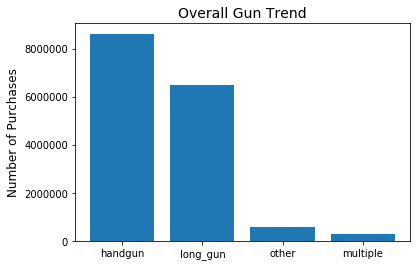

In [51]:
plt.xticks(xlabel, guns_name)
plt.ylabel('Number of Purchases', fontsize=12)
plt.title('Overall Gun Trend', fontsize =14)
plt.bar(xlabel, guns_purchases);


Most purchased gun overall is:
    
1. **Handgun**
2. Longun
3. Other guns
4. Mutiple guns

### Research Question 5 (Trend of permits of total handguns?)

In [52]:
permits_handgun = gun.groupby('permit')['handgun'].sum()
permits_handgun

permit
0.0         297045.0
1.0            111.0
2.0             56.0
4.0             60.0
6.0             69.0
10.0            66.0
17.0            52.0
19.0            98.0
24.0            83.0
25.0            65.0
35.0            68.0
37.0            16.0
42.0            25.0
47.0            15.0
54.0            17.0
55.0            48.0
61.0            17.0
64.0            27.0
71.0         12661.0
72.0            26.0
81.0            69.0
103.0           39.0
114.0        13325.0
126.0           25.0
137.0         2857.0
183.0         2725.0
185.0         2028.0
209.0         2320.0
222.0         2911.0
242.0         2909.0
              ...   
48301.0      14029.0
52610.0      37027.0
53278.0      56932.0
56533.0      44363.0
57839.0      37165.0
58147.0      45182.0
58722.0      42442.0
59528.0      41110.0
60142.0      42726.0
60578.0      45785.0
61808.0      63649.0
62196.0      39213.0
62397.0      41516.0
65892.0      48732.0
66895.0       9389.0
75535.0      43344.0
92422.

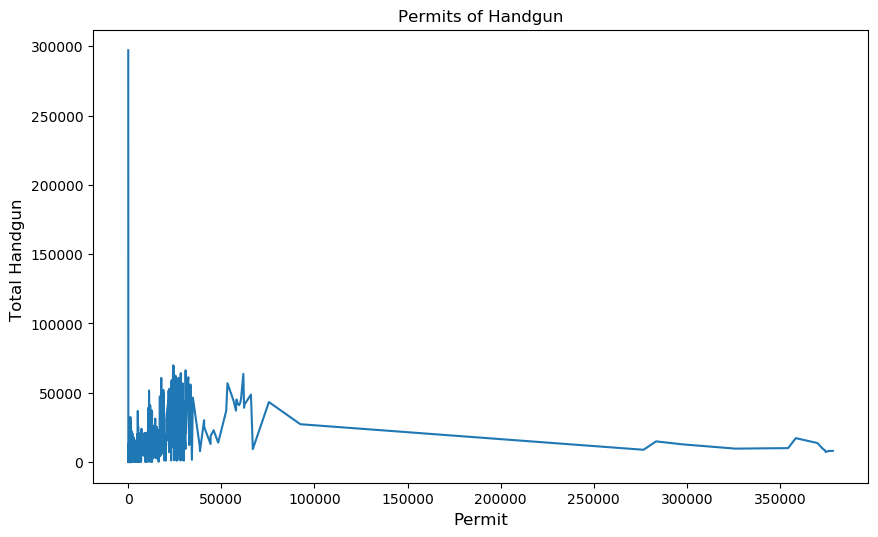

In [53]:
# Setting the figure size
plt.figure(figsize=(10,6), dpi=100)

plt.xlabel('Permit' , fontsize = 12)
plt.ylabel('Total Handgun ', fontsize = 12)
plt.title('Permits of Handgun')

# Plotting the dataframe
plt.plot(permits_handgun)

# To display the histogram
plt.show()

In [54]:
# The maximum permits for handguns are 297045
permits_handgun.max()

297045.0

**The above graph clearly shows that the total permits for handguns have been increasing throughout the years**

### Research Question 6: (What is the total number of registered guns in each state over the years?)

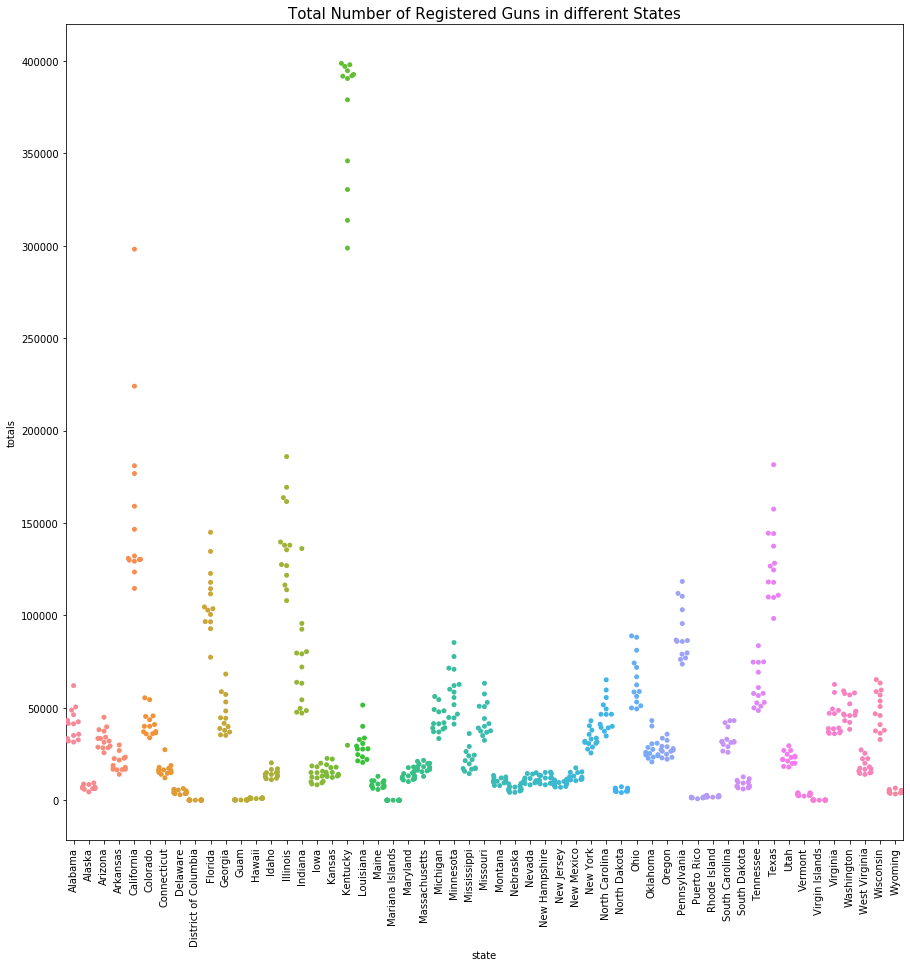

In [68]:
# Swarmplot
plt.subplots(figsize=(15,15))
plt.xticks(rotation=90);
plt.title("Total Number of Registered Guns in different States",fontsize= 15)
sns.swarmplot(x='state', y='totals', data=gun);

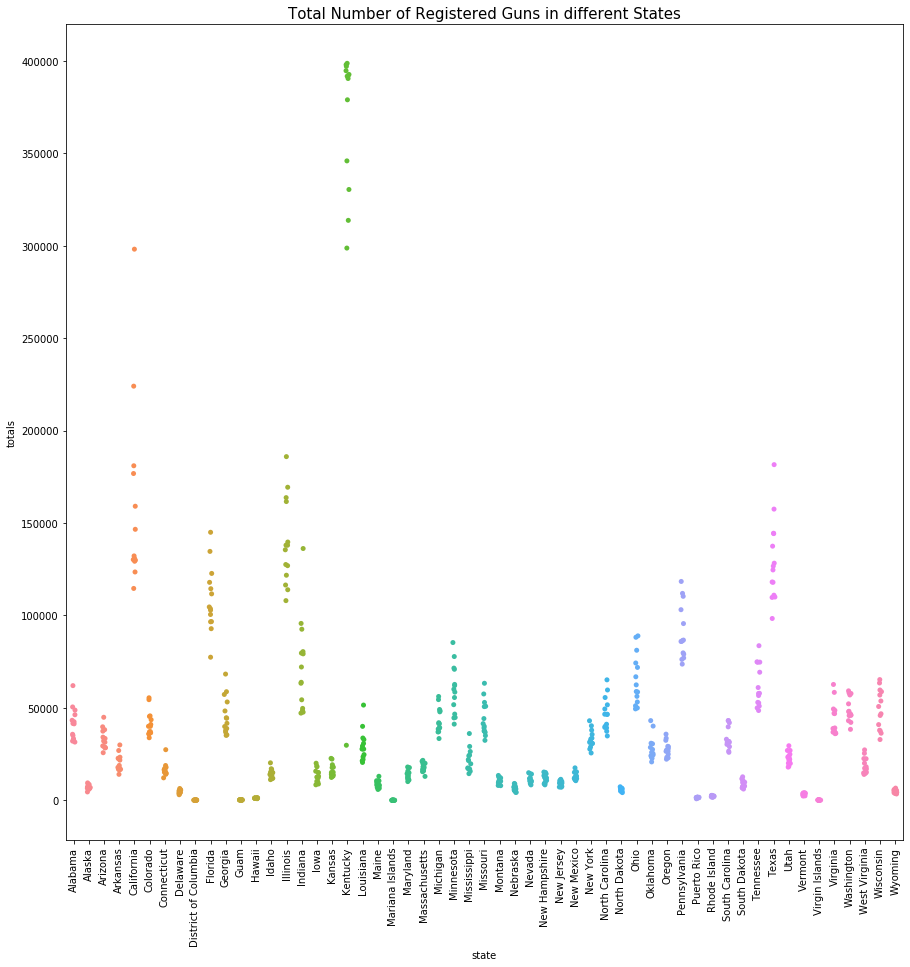

In [67]:
# Stripplot 
plt.subplots(figsize=(15,15))
plt.xticks(rotation=90);
plt.title("Total Number of Registered Guns in different States",fontsize= 15)
sns.stripplot(x='state', y='totals', data=gun);

**We can double check it from these graphs, that Kentucky is the state with most registered guns.**

### Research Question 7: (Which state has most permit rechecks??)

In [57]:
max_permit = gun['permit_recheck'].max()

In [58]:
state_permit = gun[gun['permit_recheck']== max_permit]

In [59]:
state_permit

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
344,2017-03-01,Illinois,911.0,116681.0,30518.0,14411.0,0.0,1207,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,163728


In [60]:
# Double checking maximum permit state using idxmax() function
gun['permit_recheck'].idxmax()

344

**Hence the state Illinois has the most permit rechecks out of all states, with a total number of 116681 permit rechecks**

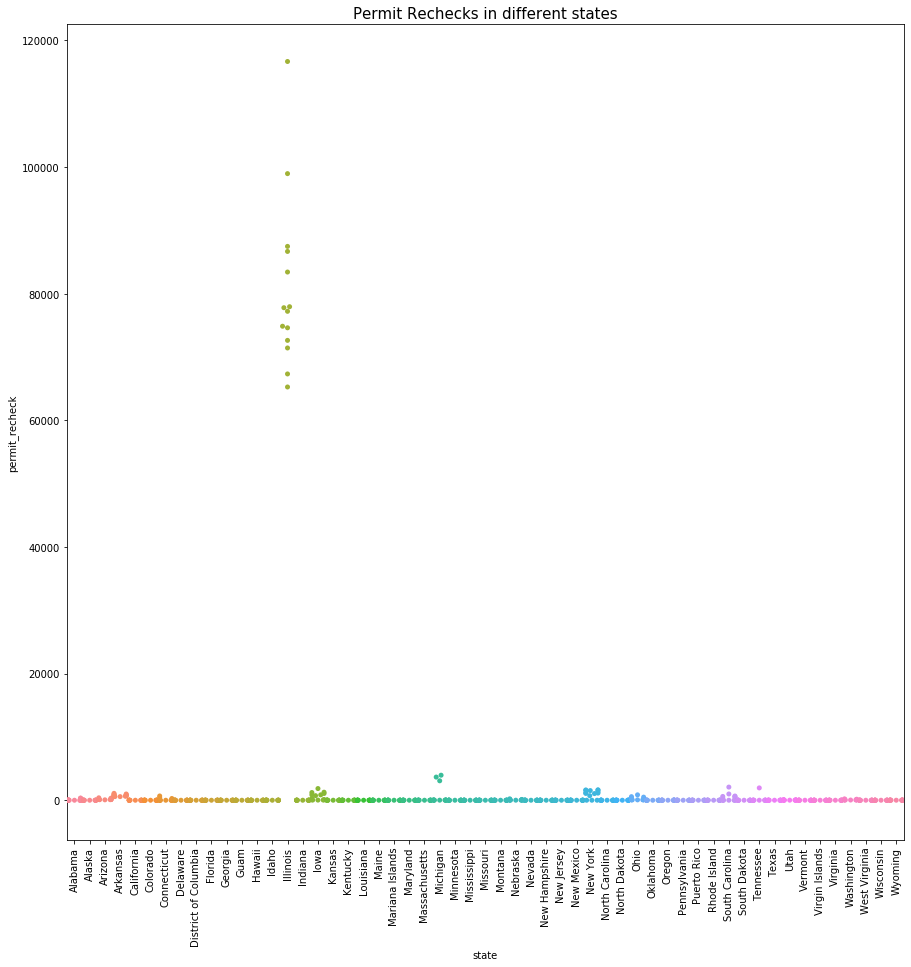

In [66]:
# Confirming through a Swarmplot
plt.subplots(figsize=(15,15))
plt.xticks(rotation=90);
plt.title("Permit Rechecks in different states", fontsize=15)
sns.swarmplot(x='state', y='permit_recheck', data=gun);

**We can also see from the graph that the state Illinois has the most permit rechecks.**

<a id='conclusions'></a>
## Conclusions

  The first research question **"Which gun is commonly preferred by civilians?"** has shown valuable answer, as we came to know that most civilians prefer to use a **handgun** which is an important thing to know.
 
 The second research question **In state of Puerto Rico which guns are mostly used?** showed an accurate result, as it showed    that Puerto Ricans also prefer to use handguns, which was also evident from Research Question 1.

 The third research question **Which state has issued most permits for guns?** was accurately answered and showed that **Kentucky** is the state which issued most permits for guns with a total amount of 378384 permits.

 The fourth research question **What is the overall trend of all guns purchasing?** showed not so surprising results since we already knew that **handguns** are the top most preferred guns all across the world. It also showed similar results in which **handguns** are purchased most frequently and **multiple guns** are purchased rarely by people.

 The fifth research question **Trend of permits of total handguns?** gave us surprising results and showed that the permits of handguns have been increasing rapidly over the years.

 The sixth research question **What is the total number of registered guns in each state over the years?** was answered through a swarmplot and a stripplot. The graphs clearly indicated that the state **Kentucky** has the maximum number of registered guns.

 The seventh research question **Which state has most permit rechecks?** shows quite useful results to the civilians of the state of **Illinois** because now the people who didn't have licensed permit will be more careful because there are frequent permit rechecks.


##### The limitations of current study were quite obvious, the gun data had some missing values, data was seperated into two separate files which could affect the process of analysis and make it harder. Conversely, the population estimation were only recorded for 2010 and 2016, which limits our Data Analysis.